In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import required libraries & modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go

# Import data

In [3]:
df=pd.read_excel('Booking_Data.xlsx')
df.head()

Booking ID   Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0           1  Resort   2014-07-24   2015-07-01        342       0       2   
1           2  Resort   2013-06-24   2015-07-01        737       0       2   
2           3  Resort   2015-06-24   2015-07-01          7       1       1   
3           4  Resort   2015-06-18   2015-07-01         13       1       1   
4           5  Resort   2015-06-17   2015-07-01         14       2       2   

  Distribution Channel Customer Type         Country Deposit Type  \
0               Direct     Transient        Portugal   No Deposit   
1               Direct     Transient        Portugal   No Deposit   
2               Direct     Transient  United Kingdom   No Deposit   
3            Corporate     Transient  United Kingdom   No Deposit   
4  Online Travel Agent     Transient  United Kingdom   No Deposit   

   Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
0             0.0  Check-Out    2015-07-01                0      0.0   
1             0.0  Check-Out    2015-07-01                0      0.0   
2            75.0  Check-Out    2015-07-02                0     75.0   
3            75.0  Check-Out    2015-07-02                0     75.0   
4            98.0  Check-Out    2015-07-03                0    196.0   

   Revenue Loss  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

# Exploratory Data Analysis

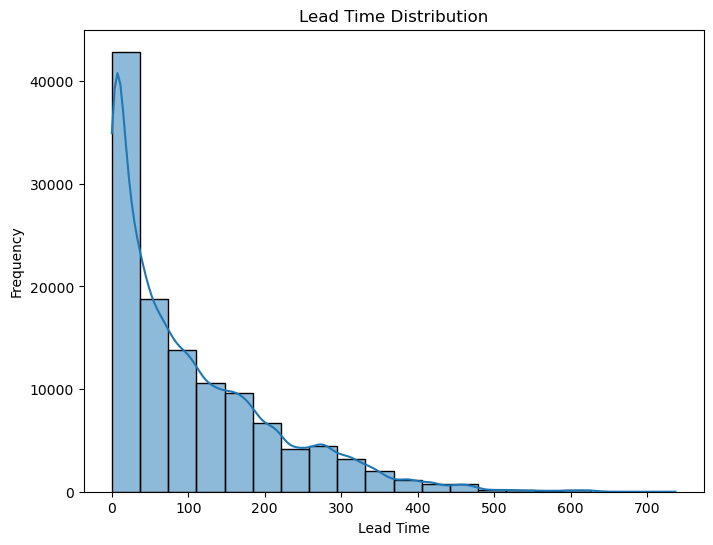

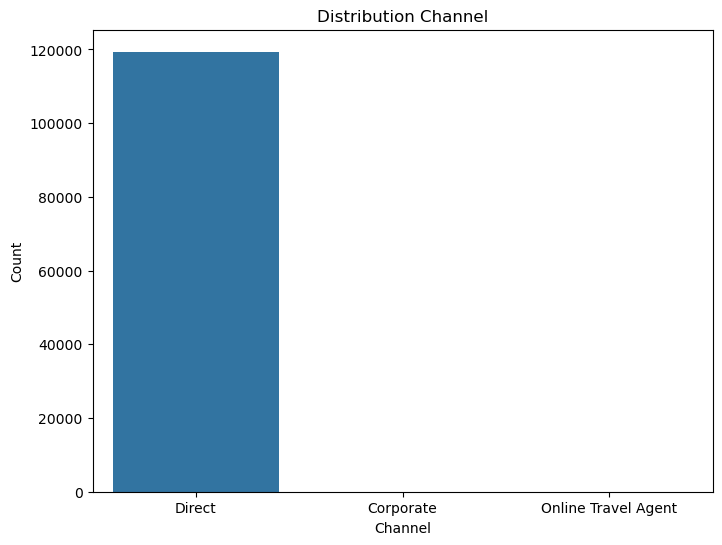

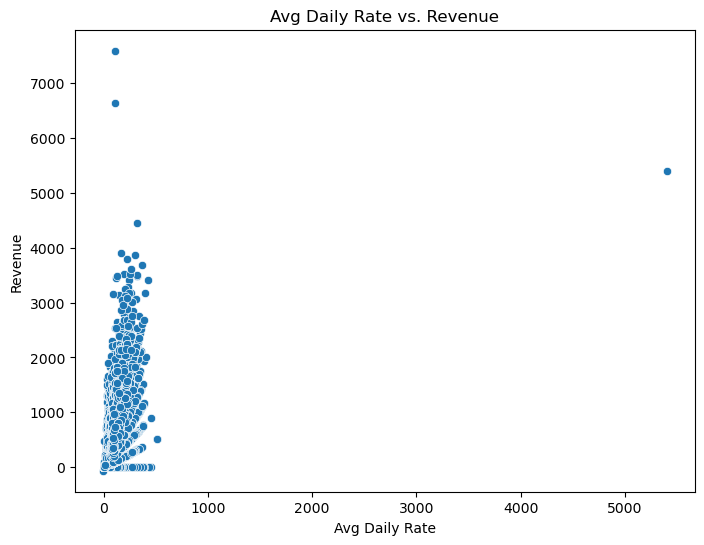

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Lead Time'], bins=20, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Distribution Channel')
plt.title('Distribution Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg Daily Rate', y='Revenue')
plt.title('Avg Daily Rate vs. Revenue')
plt.xlabel('Avg Daily Rate')
plt.ylabel('Revenue')
plt.show()


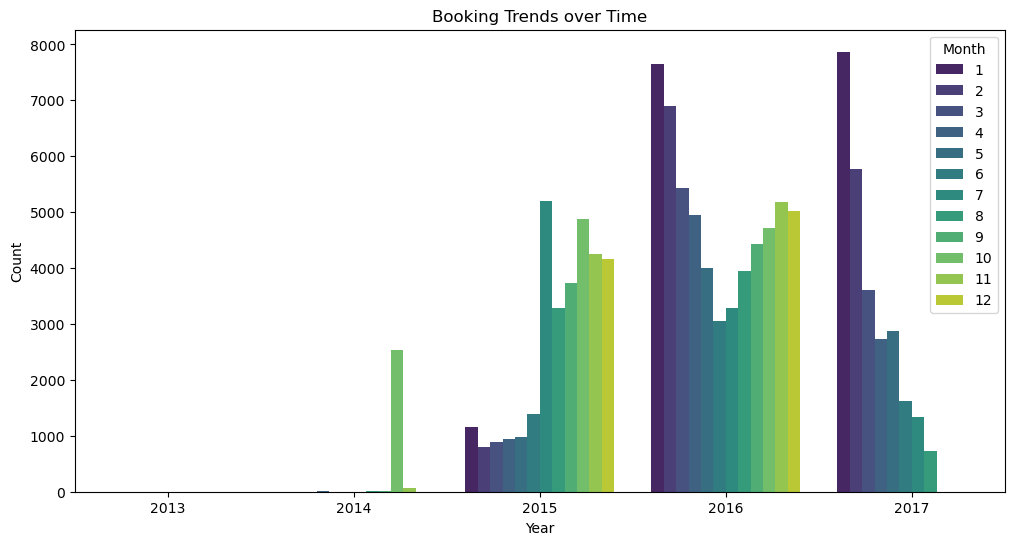

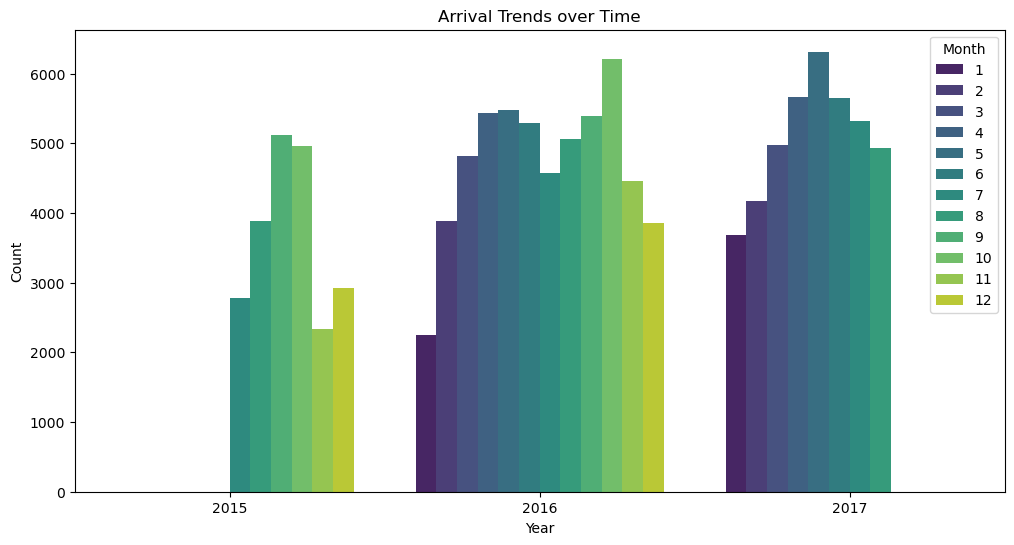

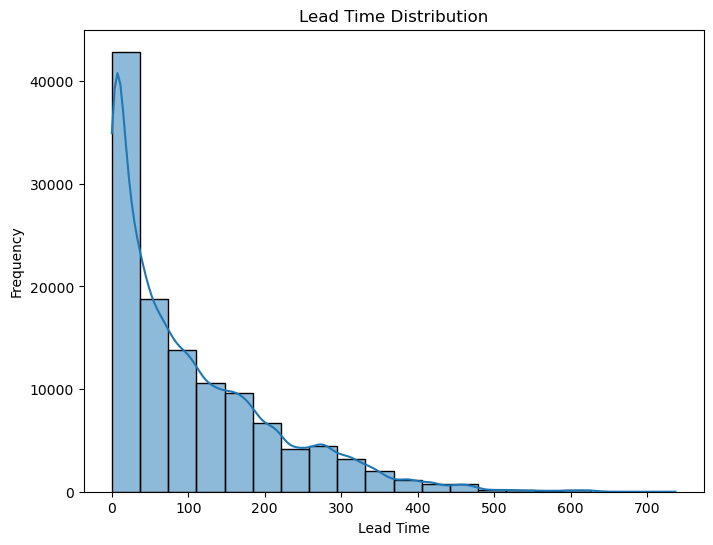

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Booking Date'] = pd.to_datetime(df['Booking Date'])
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Booking Year'] = df['Booking Date'].dt.year
df['Booking Month'] = df['Booking Date'].dt.month
df['Arrival Year'] = df['Arrival Date'].dt.year
df['Arrival Month'] = df['Arrival Date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Booking Year', hue='Booking Month', palette='viridis')
plt.title('Booking Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month')
plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Arrival Year', hue='Arrival Month', palette='viridis')
plt.title('Arrival Trends over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['Lead Time'], bins=20, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()


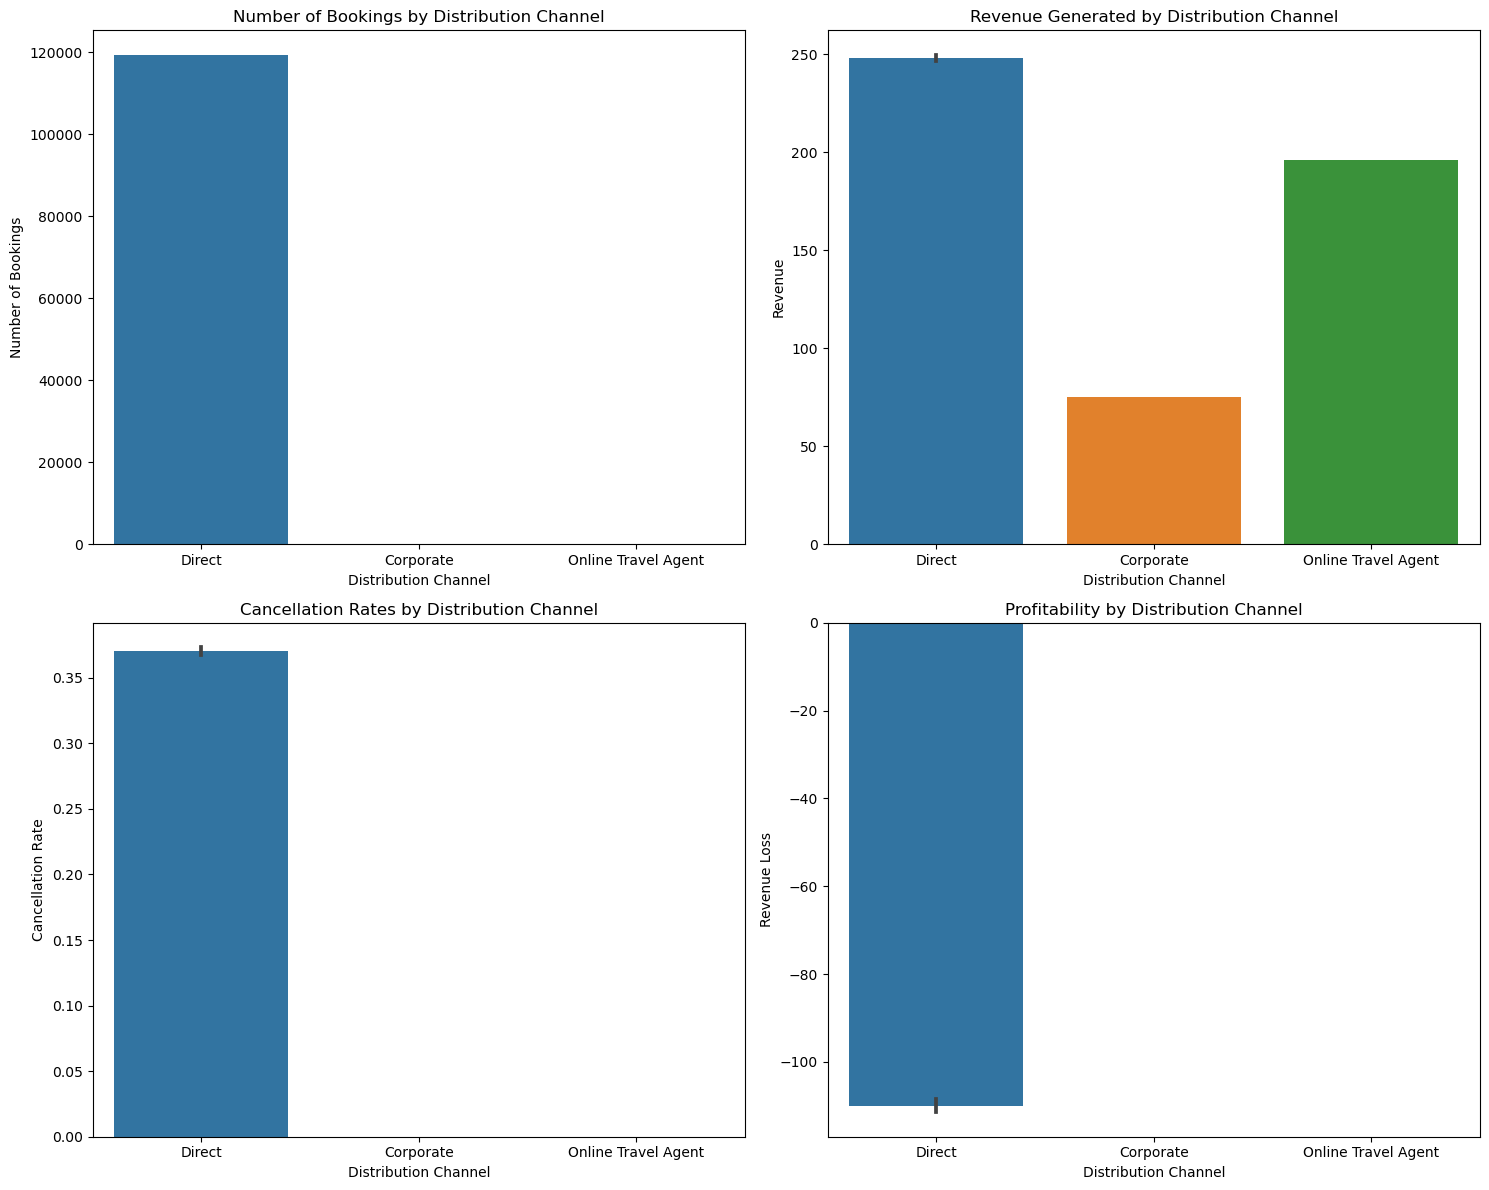

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, x='Distribution Channel', ax=axs[0, 0])
axs[0, 0].set_title('Number of Bookings by Distribution Channel')
axs[0, 0].set_xlabel('Distribution Channel')
axs[0, 0].set_ylabel('Number of Bookings')
sns.barplot(data=df, x='Distribution Channel', y='Revenue', ax=axs[0, 1])
axs[0, 1].set_title('Revenue Generated by Distribution Channel')
axs[0, 1].set_xlabel('Distribution Channel')
axs[0, 1].set_ylabel('Revenue')
sns.barplot(data=df, x='Distribution Channel', y='Cancelled (0/1)', ax=axs[1, 0])
axs[1, 0].set_title('Cancellation Rates by Distribution Channel')
axs[1, 0].set_xlabel('Distribution Channel')
axs[1, 0].set_ylabel('Cancellation Rate')
sns.barplot(data=df, x='Distribution Channel', y='Revenue Loss', ax=axs[1, 1])
axs[1, 1].set_title('Profitability by Distribution Channel')
axs[1, 1].set_xlabel('Distribution Channel')
axs[1, 1].set_ylabel('Revenue Loss')
plt.tight_layout()
plt.show()

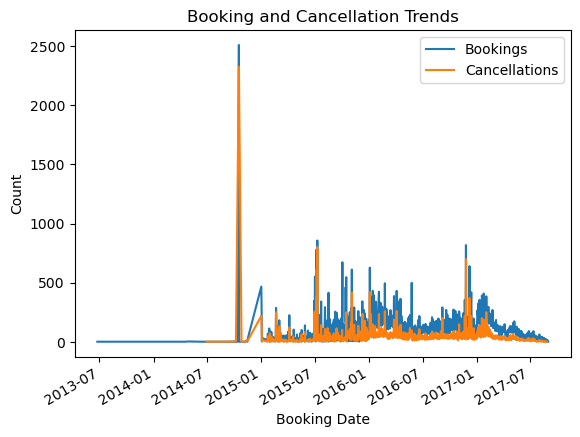

In [9]:
df['Booking Date'] = pd.to_datetime(df['Booking Date'])
booking_counts = df['Booking Date'].value_counts().sort_index()
booking_counts.plot(x='Booking Date', y='Booking Count', label='Bookings')
cancelled_counts = df[df['Cancelled (0/1)'] == 1]['Booking Date'].value_counts().sort_index()
cancelled_counts.plot(x='Booking Date', y='Cancellation Count', label='Cancellations')
plt.xlabel('Booking Date')
plt.ylabel('Count')
plt.title('Booking and Cancellation Trends')
plt.legend()
plt.show()

In [31]:
df['Year-Month'] = df['Booking Date'].dt.to_period('M')
df["Booking Date"] = pd.to_datetime(df["Booking Date"])
df["Year-Month"] = df["Year-Month"].astype(str)
booking_trends = df.groupby("Year-Month").size().reset_index(name='Bookings')
fig = px.line(booking_trends, x="Year-Month", y="Bookings", title="Booking Trends Over Time",
              labels={"Year-Month": "Month", "Bookings": "Number of Bookings"},
              markers=True)
fig.update_xaxes(dtick="M1", tickformat="%b\n%Y", title="Month")
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Bookings")

fig.show()

In [20]:
bookings_by_country=df['Country'].value_counts().reset_index()
bookings_by_country.rename(columns={'count': 'Bookings'}, inplace=True)
bookings_by_country

Country  Bookings
0          Portugal     48590
1    United Kingdom     12129
2            France     10415
3             Spain      8568
4           Germany      7287
..              ...       ...
169        Djibouti         1
170        Botswana         1
171        Honduras         1
172  Virgin Islands         1
173    Sierra Leone         1

[174 rows x 2 columns]

In [21]:
custom_color_scale = [
    [0.0, "rgba(255,224,189,1)"], 
    [0.5, "rgba(244,164,96,1)"],  
    [1.0, "rgba(139,69,19,1)"]  
]
fig = px.choropleth(bookings_by_country,
                    locations='Country',  
                    locationmode='country names',  
                    color=np.log10(bookings_by_country['Bookings']), 
                    color_continuous_scale=custom_color_scale,  
                    title='Global Booking Distribution',  
                    hover_name='Country',
                    hover_data='Bookings', 
                    labels={'color': 'Log10(Bookings)'})  
fig.show()


In [22]:
import plotly.express as px
fig = px.histogram(df, x='Lead Time',
                   title='Distribution of Lead Times for Bookings',
                   labels={'Lead Time': 'Lead Time (days)'},
                   opacity=0.8,  
                   color_discrete_sequence=['indianred'])  

fig.update_layout(xaxis_title="Lead Time (days)",
                  yaxis_title="Number of Bookings",
                  bargap=0.2)

fig.show()

In [23]:
import plotly.express as px
fig = px.box(df, x='Distribution Channel', y='Avg Daily Rate',
             title='Average Daily Rate (ADR) by Distribution Channel',
             labels={'Avg Daily Rate': 'ADR ($)', 'Distribution Channel': 'Distribution Channel'},
             color='Distribution Channel') 
fig.update_layout(xaxis_title="Distribution Channel",
                  yaxis_title="Average Daily Rate (ADR) $",
                  boxmode='group',
                  yaxis=dict(range=[0, 500]))  

fig.show()


In [24]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
revenue_loss_over_time = df.groupby(df['Arrival Date'].dt.to_period('M'))['Revenue Loss'].sum().reset_index()
revenue_loss_over_time['Arrival Date'] = revenue_loss_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(revenue_loss_over_time, x='Arrival Date', y='Revenue Loss',
              title='Revenue Loss Over Time',
              labels={'Revenue Loss': 'Revenue Loss ($)', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Revenue Loss ($)',
                  xaxis=dict(tickformat='%b\n%Y')) 

fig.show()

# "This graph shows us how much money our hotel has not been able to earn from expected bookings. This might include situations like guests cancelling their rooms, or rooms that remained unbooked. The vertical axis shows the amount of revenue lost in dollars, and the horizontal axis represents the time from July 2015 to July 2017.

# At the start of the graph in July 2015, we were losing about $200,000 per month. As time went on, the amount of revenue we were losing started to increase, reaching up to $600,000 by early 2016. This was a challenging period for us.

# However, after that peak, we see some ups and downs, but the overall trend is that the amount of revenue we're losing has been going down. By July 2017, our monthly revenue loss decreased significantly to the lowest point in the graph at around $1.4 million.

# This is a good sign! It means that by the middle of 2017, we were doing much better at keeping our rooms booked and reducing cancellations. This improvement could be due to many factors, like better marketing, more competitive pricing, improved customer service, or a stronger economy.

# In summary, while it's not great to see that we've lost revenue, the important thing is that we're on the right track and have been improving over the last two years. Our strategies to reduce these losses are showing positive results, and we should continue in this direction."

# Remember to provide context for any strategies or actions that have been implemented during this time frame to help the audience understand what led to the improvements seen in the graph.

In [25]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
revenue_over_time = df.groupby(df['Arrival Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
revenue_over_time['Arrival Date'] = revenue_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(revenue_over_time, x='Arrival Date', y='Revenue',
              title='Revenue Over Time',
              labels={'Revenue': 'Revenue ($)', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Revenue ($)',
                  xaxis=dict(tickformat='%b\n%Y'))
fig.show()


In [26]:

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
summary_over_time = df.groupby(df['Arrival Date'].dt.to_period('M')).agg({'Revenue': 'sum', 'Revenue Loss': 'sum'}).reset_index()
summary_over_time['Arrival Date'] = summary_over_time['Arrival Date'].dt.to_timestamp()
fig = go.Figure()
fig.add_trace(go.Line(x=summary_over_time['Arrival Date'], y=summary_over_time['Revenue'],
                      name='Revenue', marker=dict(color='green')))
fig.add_trace(go.Line(x=summary_over_time['Arrival Date'], y=summary_over_time['Revenue Loss'],
                      name='Revenue Loss', marker=dict(color='red')))
fig.update_layout(title='Revenue and Revenue Loss Over Time',
                  xaxis_title='Date',
                  yaxis_title='Amount ($)',
                  xaxis=dict(tickformat='%b\n%Y'))

fig.show()


/Users/domala81/opt/anaconda3/envs/Lungsegment/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/Users/domala81/opt/anaconda3/envs/Lungsegment/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [27]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Net Revenue'] = df['Revenue'] + df['Revenue Loss']
summary_over_time = df.groupby(df['Arrival Date'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'Revenue Loss': 'sum',
    'Net Revenue': 'sum'
}).reset_index()
summary_over_time['Arrival Date'] = summary_over_time['Arrival Date'].dt.to_timestamp()
fig = px.line(summary_over_time, x='Arrival Date',
              y=['Revenue', 'Revenue Loss', 'Net Revenue'],
              title='Revenue and Net Revenue Over Time',
              labels={'value': 'Dollars ($)', 'variable': 'Type', 'Arrival Date': 'Date'},
              markers=True)
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Dollars ($)',
                  xaxis=dict(tickformat='%b\n%Y'))
fig.show()


# Data cleaning for feeding to ML models

In [28]:
df2 = pd.get_dummies(df,
                     columns=['Distribution Channel', 'Customer Type',
                              'Deposit Type', 'Status', 'Hotel'],
                     drop_first=True)

df2.head()

Booking ID Booking Date Arrival Date  Lead Time  Nights  Guests  \
0           1   2014-07-24   2015-07-01        342       0       2   
1           2   2013-06-24   2015-07-01        737       0       2   
2           3   2015-06-24   2015-07-01          7       1       1   
3           4   2015-06-18   2015-07-01         13       1       1   
4           5   2015-06-17   2015-07-01         14       2       2   

          Country  Avg Daily Rate Status Update  Cancelled (0/1)  ...  \
0        Portugal             0.0    2015-07-01                0  ...   
1        Portugal             0.0    2015-07-01                0  ...   
2  United Kingdom            75.0    2015-07-02                0  ...   
3  United Kingdom            75.0    2015-07-02                0  ...   
4  United Kingdom            98.0    2015-07-03                0  ...   

   Distribution Channel_Online Travel Agent  Customer Type_Group  \
0                                     False                False   
1                                     False                False   
2                                     False                False   
3                                     False                False   
4                                      True                False   

   Customer Type_Transient  Customer Type_Transient-Party  \
0                     True                          False   
1                     True                          False   
2                     True                          False   
3                     True                          False   
4                     True                          False   

   Deposit Type_Non Refundable  Deposit Type_Refundable  Status_Check-Out  \
0                        False                    False              True   
1                        False                    False              True   
2                        False                    False              True   
3                        False                    False              True   
4                        False                    False              True   

   Status_No-Show  Status_sggrthrwtrhrtb  Hotel_Resort  
0           False                  False          True  
1           False                  False          True  
2           False                  False          True  
3           False                  False          True  
4           False                  False          True  

[5 rows x 28 columns]

In [29]:
df3 = df2.drop(['Booking ID', 'Booking Date', 'Status Update',
                'Arrival Date', 'Status_sggrthrwtrhrtb'],
               axis=1)

df3.head()

Lead Time  Nights  Guests         Country  Avg Daily Rate  Cancelled (0/1)  \
0        342       0       2        Portugal             0.0                0   
1        737       0       2        Portugal             0.0                0   
2          7       1       1  United Kingdom            75.0                0   
3         13       1       1  United Kingdom            75.0                0   
4         14       2       2  United Kingdom            98.0                0   

   Revenue  Revenue Loss  Booking Year  Booking Month  ...  \
0      0.0           0.0          2014              7  ...   
1      0.0           0.0          2013              6  ...   
2     75.0           0.0          2015              6  ...   
3     75.0           0.0          2015              6  ...   
4    196.0           0.0          2015              6  ...   

   Distribution Channel_Direct  Distribution Channel_Online Travel Agent  \
0                         True                                     False   
1                         True                                     False   
2                         True                                     False   
3                        False                                     False   
4                        False                                      True   

   Customer Type_Group  Customer Type_Transient  \
0                False                     True   
1                False                     True   
2                False                     True   
3                False                     True   
4                False                     True   

   Customer Type_Transient-Party  Deposit Type_Non Refundable  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   Deposit Type_Refundable  Status_Check-Out  Status_No-Show  Hotel_Resort  
0                    False              True           False          True  
1                    False              True           False          True  
2                    False              True           False          True  
3                    False              True           False          True  
4                    False              True           False          True  

[5 rows x 23 columns]

In [30]:
df3 = df3.dropna()

In [32]:
df3.isna().sum()
df3.head()

Lead Time  Nights  Guests         Country  Avg Daily Rate  Cancelled (0/1)  \
0        342       0       2        Portugal             0.0                0   
1        737       0       2        Portugal             0.0                0   
2          7       1       1  United Kingdom            75.0                0   
3         13       1       1  United Kingdom            75.0                0   
4         14       2       2  United Kingdom            98.0                0   

   Revenue  Revenue Loss  Booking Year  Booking Month  ...  \
0      0.0           0.0          2014              7  ...   
1      0.0           0.0          2013              6  ...   
2     75.0           0.0          2015              6  ...   
3     75.0           0.0          2015              6  ...   
4    196.0           0.0          2015              6  ...   

   Distribution Channel_Direct  Distribution Channel_Online Travel Agent  \
0                         True                                     False   
1                         True                                     False   
2                         True                                     False   
3                        False                                     False   
4                        False                                      True   

   Customer Type_Group  Customer Type_Transient  \
0                False                     True   
1                False                     True   
2                False                     True   
3                False                     True   
4                False                     True   

   Customer Type_Transient-Party  Deposit Type_Non Refundable  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   Deposit Type_Refundable  Status_Check-Out  Status_No-Show  Hotel_Resort  
0                    False              True           False          True  
1                    False              True           False          True  
2                    False              True           False          True  
3                    False              True           False          True  
4                    False              True           False          True  

[5 rows x 23 columns]

In [33]:
len(df3['Country'].unique())

174

In [34]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df3['Country']= label_encoder.fit_transform(df3['Country'])

df3['Country'].unique()

array([128, 165, 166, 148,  77,  55, 132, 119, 120,   7, 127,  60,  18,
       153,  33,  63,  80, 114,  42, 133, 152,  10,  50,  41,  23,  54,
       110,  22,  94, 146,   0,  73, 106, 109, 163, 137,  89, 129, 141,
        32,  11,  17,  93, 161, 147,   4,  79,  30, 172,  29, 173,   1,
       131,  36,  71, 164, 160,  81,  38,  70,  75,  59,   3,  62, 167,
        83,  31,  40,  34,  66,  88, 118, 100, 169, 145,  53,  85, 121,
        74,  90, 126, 140, 142,  12,  14, 116, 158,  45,  96,  99,   8,
        82, 149,  39,  28,  21, 104,  35, 151, 162,  24,  37,  84, 154,
       144,  26, 139, 170, 122, 130,  48, 125, 102,  98,  47,  97,  72,
       168, 113,  13,  95, 159, 155,  43, 138, 135,  51,  76,  69, 134,
        27, 107,  15,  78, 156, 117,  19, 171, 157,  58,  61,  46,  64,
        86,  92,  67, 108, 105,  52, 111, 123,  25,  91, 101, 112,  20,
       124,  16,   9,   5,  49,  44,  56,  68, 136,   6,  65,   2, 103,
       115,  87, 150,  57, 143])

In [35]:
df3.head()

Lead Time  Nights  Guests  Country  Avg Daily Rate  Cancelled (0/1)  \
0        342       0       2      128             0.0                0   
1        737       0       2      128             0.0                0   
2          7       1       1      165            75.0                0   
3         13       1       1      165            75.0                0   
4         14       2       2      165            98.0                0   

   Revenue  Revenue Loss  Booking Year  Booking Month  ...  \
0      0.0           0.0          2014              7  ...   
1      0.0           0.0          2013              6  ...   
2     75.0           0.0          2015              6  ...   
3     75.0           0.0          2015              6  ...   
4    196.0           0.0          2015              6  ...   

   Distribution Channel_Direct  Distribution Channel_Online Travel Agent  \
0                         True                                     False   
1                         True                                     False   
2                         True                                     False   
3                        False                                     False   
4                        False                                      True   

   Customer Type_Group  Customer Type_Transient  \
0                False                     True   
1                False                     True   
2                False                     True   
3                False                     True   
4                False                     True   

   Customer Type_Transient-Party  Deposit Type_Non Refundable  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   Deposit Type_Refundable  Status_Check-Out  Status_No-Show  Hotel_Resort  
0                    False              True           False          True  
1                    False              True           False          True  
2                    False              True           False          True  
3                    False              True           False          True  
4                    False              True           False          True  

[5 rows x 23 columns]

# Training models

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df3.drop('Cancelled (0/1)', axis=1)
y = df3['Cancelled (0/1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logistic_regression.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, y_pred_knn)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
lda_accuracy = accuracy_score(y_test, y_pred_lda)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

print('KNN accuracy score: ', knn_accuracy)
print('Logistic Regression accuracy score: ', logreg_accuracy)
print('LDA accuracy score: ', lda_accuracy)
print('Random Forest accuracy score: ', rf_accuracy)
print('Gradient Boosting accuracy score: ', gbm_accuracy)

KNN accuracy score:  0.9867961818258273
Logistic Regression accuracy score:  0.9839367562339683
LDA accuracy score:  0.9229216601488583
Random Forest accuracy score:  1.0
Gradient Boosting accuracy score:  1.0


In [38]:
train_accuracy_knn = knn.score(X_train, y_train)
train_accuracy_logreg = logistic_regression.score(X_train, y_train)
train_accuracy_lda = lda.score(X_train, y_train)
train_accuracy_rf = random_forest.score(X_train, y_train)
train_accuracy_gbm = gbm.score(X_train, y_train)

print("Training accuracy for KNN:", train_accuracy_knn)
print("Training accuracy for Logistic Regression:", train_accuracy_logreg)
print("Training accuracy for Linear Discriminant Analysis (LDA):", train_accuracy_lda)
print("Training accuracy for Random Forest:", train_accuracy_rf)
print("Training accuracy for Gradient Boosting Machines (GBM):", train_accuracy_gbm)

Training accuracy for KNN: 0.9913478621965707
Training accuracy for Logistic Regression: 0.9851662619190295
Training accuracy for Linear Discriminant Analysis (LDA): 0.922929742117934
Training accuracy for Random Forest: 1.0
Training accuracy for Gradient Boosting Machines (GBM): 1.0


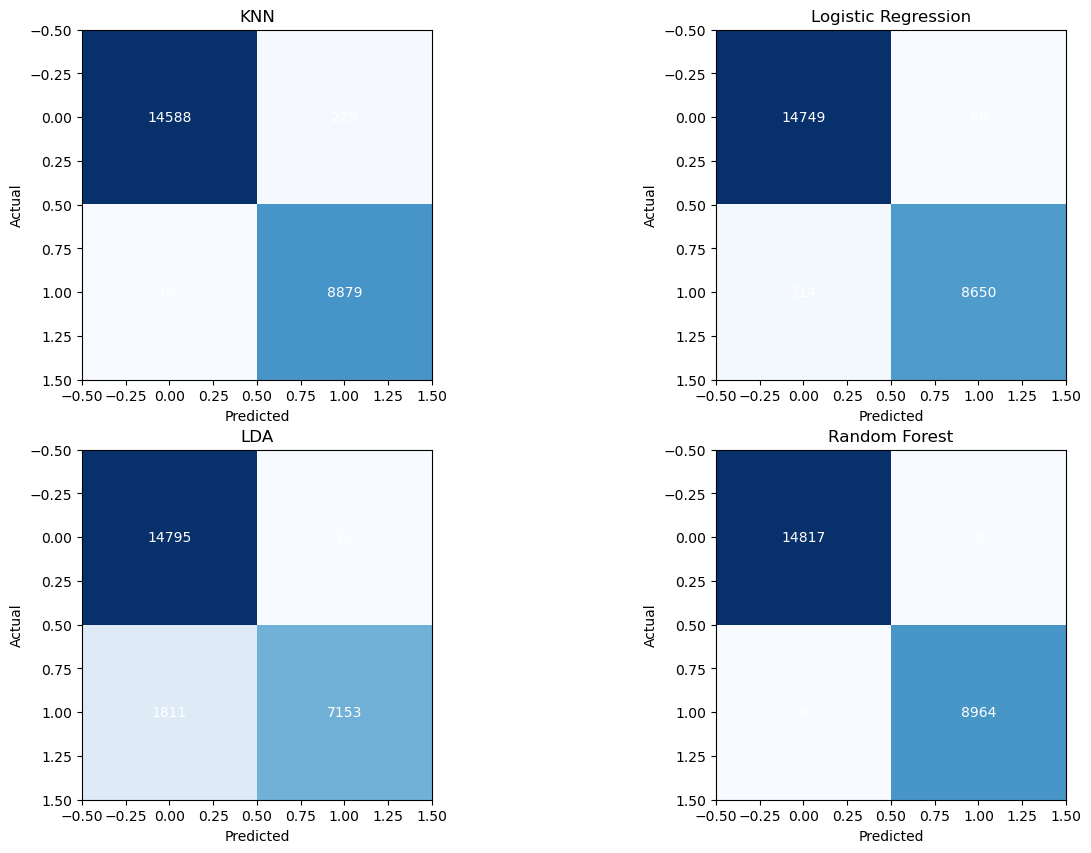

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the confusion matrix for each model
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
axes[0, 0].imshow(confusion_matrix_knn, cmap='Blues')
axes[0, 0].set_title('KNN')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
for i in range(len(confusion_matrix_knn)):
  for j in range(len(confusion_matrix_knn[0])):
    axes[0, 0].text(j, i, confusion_matrix_knn[i][j], ha='center', va='center', color='white')

confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
axes[0, 1].imshow(confusion_matrix_logreg, cmap='Blues')
axes[0, 1].set_title('Logistic Regression')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
for i in range(len(confusion_matrix_logreg)):
  for j in range(len(confusion_matrix_logreg[0])):
    axes[0, 1].text(j, i, confusion_matrix_logreg[i][j], ha='center', va='center', color='white')

confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
axes[1, 0].imshow(confusion_matrix_lda, cmap='Blues')
axes[1, 0].set_title('LDA')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')
for i in range(len(confusion_matrix_lda)):
  for j in range(len(confusion_matrix_lda[0])):
    axes[1, 0].text(j, i, confusion_matrix_lda[i][j], ha='center', va='center', color='white')

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
axes[1, 1].imshow(confusion_matrix_rf, cmap='Blues')
axes[1, 1].set_title('Random Forest')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')
for i in range(len(confusion_matrix_rf)):
  for j in range(len(confusion_matrix_rf[0])):
    axes[1, 1].text(j, i, confusion_matrix_rf[i][j], ha='center', va='center', color='white')

# Show the plot
plt.show()

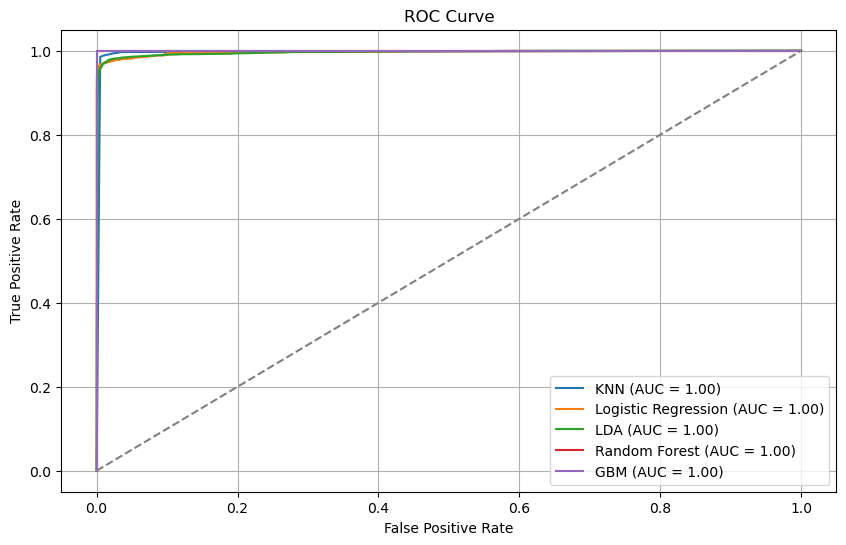

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Calculate ROC curve and AUC score for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
auc_logreg = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])

# Calculate ROC curve and AUC score for LDA
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda.predict_proba(X_test)[:, 1])
auc_lda = roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1])

# Calculate ROC curve and AUC score for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Calculate ROC curve and AUC score for GBM
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])
auc_gbm = roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, label=f'GBM (AUC = {auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


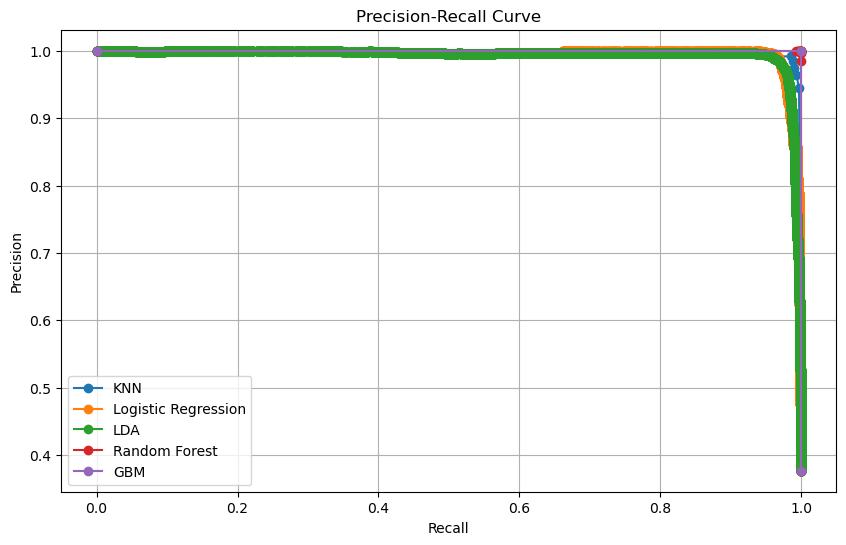

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision-recall curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

# Calculate precision-recall curve for Logistic Regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

# Calculate precision-recall curve for LDA
precision_lda, recall_lda, _ = precision_recall_curve(y_test, lda.predict_proba(X_test)[:, 1])

# Calculate precision-recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

# Calculate precision-recall curve for GBM
precision_gbm, recall_gbm, _ = precision_recall_curve(y_test, gbm.predict_proba(X_test)[:, 1])

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_knn, precision_knn, marker='o', label='KNN')
plt.plot(recall_logreg, precision_logreg, marker='o', label='Logistic Regression')
plt.plot(recall_lda, precision_lda, marker='o', label='LDA')
plt.plot(recall_rf, precision_rf, marker='o', label='Random Forest')
plt.plot(recall_gbm, precision_gbm, marker='o', label='GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


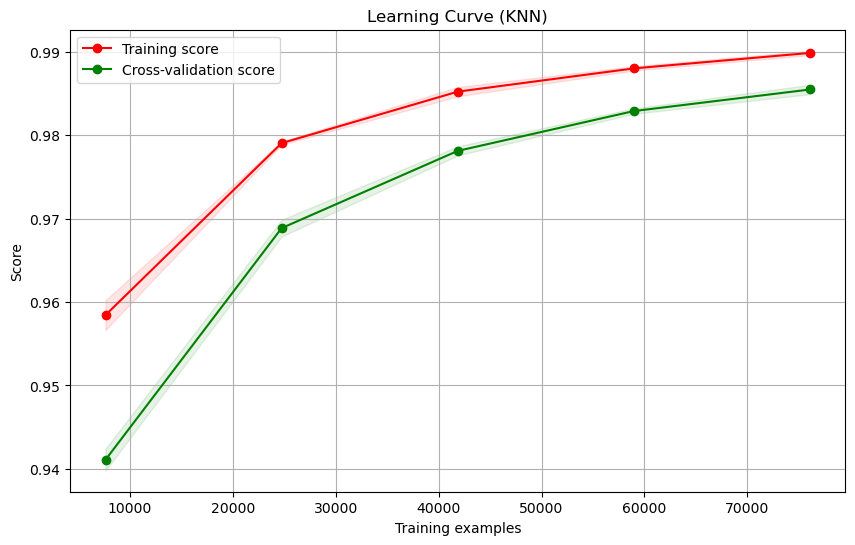

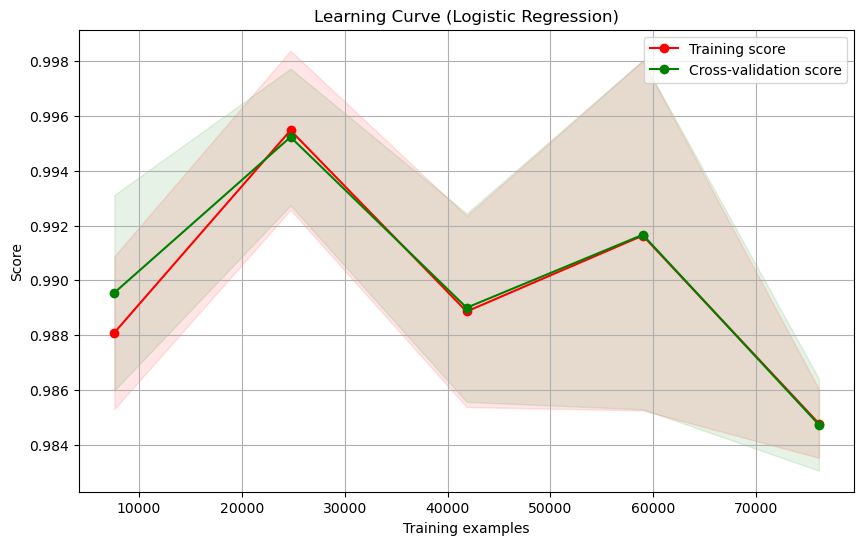

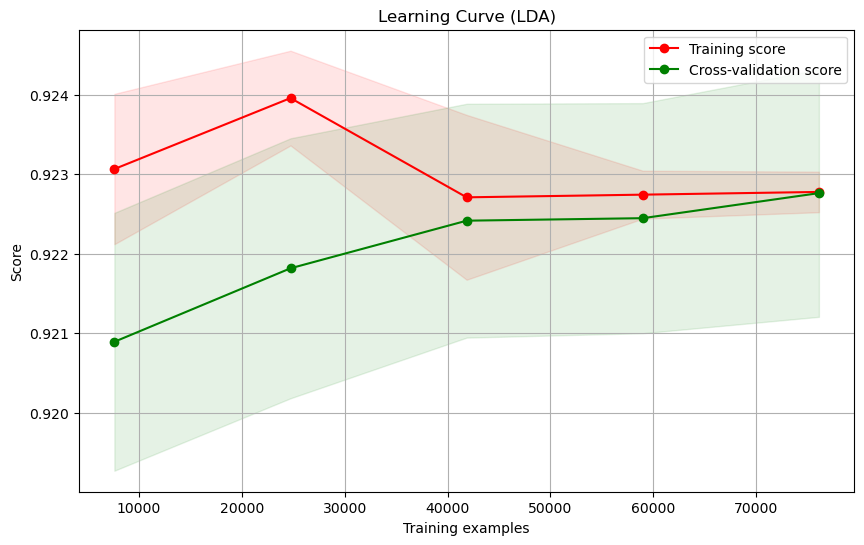

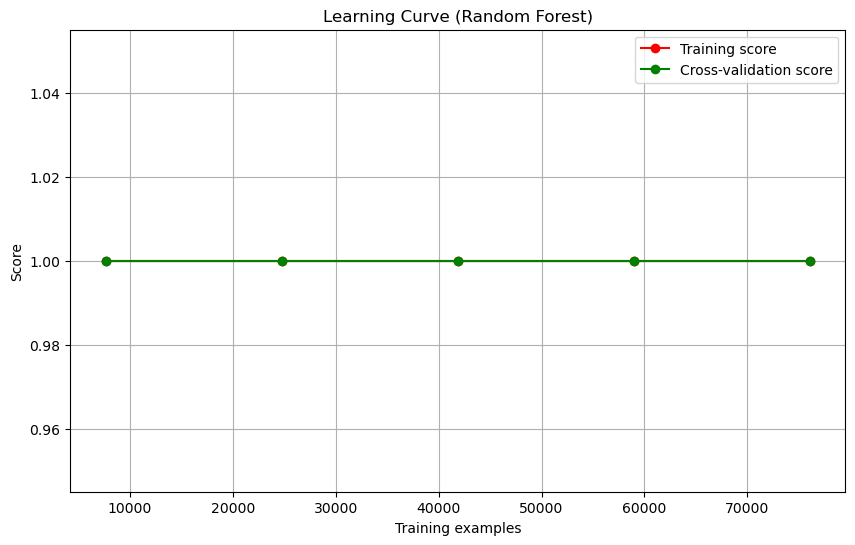

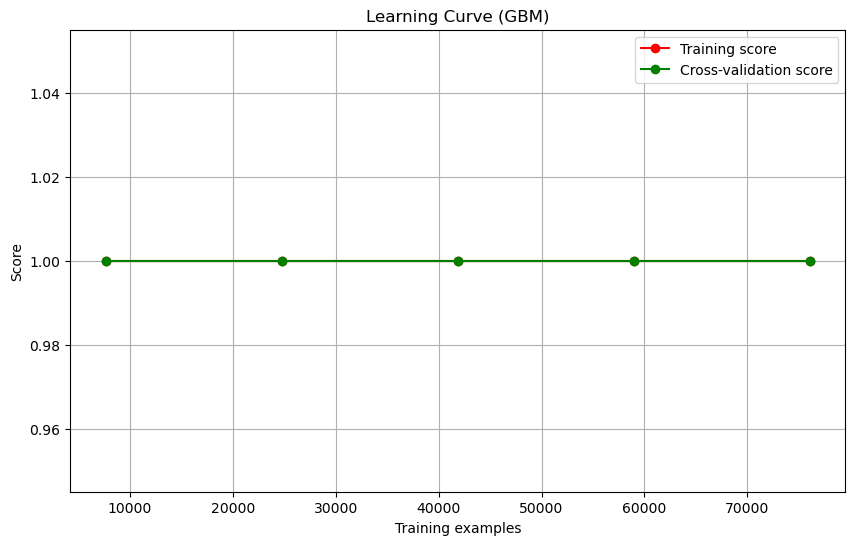

In [42]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(knn, "Learning Curve (KNN)", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(logistic_regression, "Learning Curve (Logistic Regression)", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(lda, "Learning Curve (LDA)", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(random_forest, "Learning Curve (Random Forest)", X_train, y_train, cv=5)
plt.show()

plot_learning_curve(gbm, "Learning Curve (GBM)", X_train, y_train, cv=5)
plt.show()


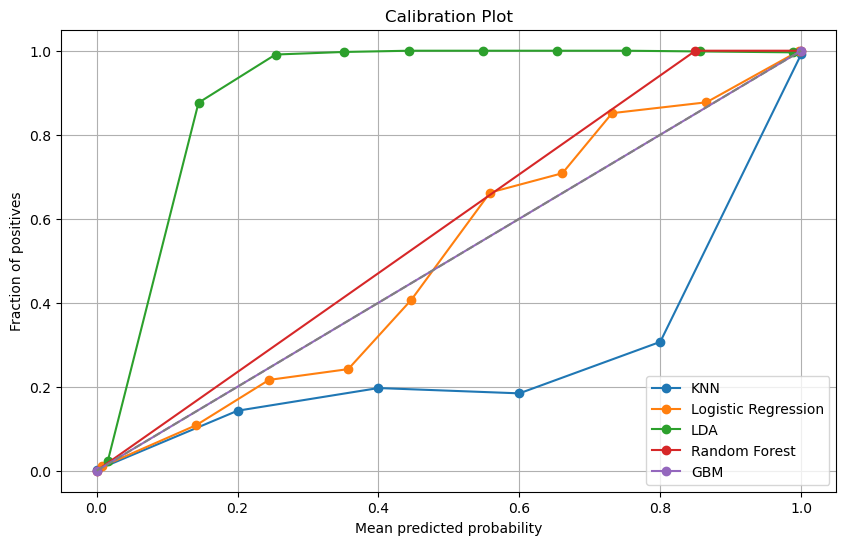

In [43]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calculate calibration curve for KNN
prob_pos_knn, mean_pred_knn = calibration_curve(y_test, knn.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate calibration curve for Logistic Regression
prob_pos_logreg, mean_pred_logreg = calibration_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate calibration curve for LDA
prob_pos_lda, mean_pred_lda = calibration_curve(y_test, lda.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate calibration curve for Random Forest
prob_pos_rf, mean_pred_rf = calibration_curve(y_test, random_forest.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate calibration curve for GBM
prob_pos_gbm, mean_pred_gbm = calibration_curve(y_test, gbm.predict_proba(X_test)[:, 1], n_bins=10)

# Plot calibration curves
plt.figure(figsize=(10, 6))
plt.plot(mean_pred_knn, prob_pos_knn, marker='o', label='KNN')
plt.plot(mean_pred_logreg, prob_pos_logreg, marker='o', label='Logistic Regression')
plt.plot(mean_pred_lda, prob_pos_lda, marker='o', label='LDA')
plt.plot(mean_pred_rf, prob_pos_rf, marker='o', label='Random Forest')
plt.plot(mean_pred_gbm, prob_pos_gbm, marker='o', label='GBM')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot')
plt.legend()
plt.grid(True)
plt.show()
